Contenido bajo licencia Creative Commons BY-NC-ND. El contenido de este Notebook es creado por Ana Beatriz Acevedo Jaramillo y Daniela González González 2020. Este material es parte del curso Análisis de Estructuras del programa de Ingeniería Civil de la Universidad EAFIT.

<img src= 
"http://www.eafit.edu.co/biblioteca/PublishingImages/logos/eafit_apa.jpg" 
         alt="GeeksforGeeks logo" 
         align="left">

# Cercha plana: matriz de rigidez global del elemento

## Matriz de rigidez local

Los parámetros que definen la matriz de rigidez de una cercha plana son (para cada elemento): Área de la sección transversal (A), módulo de rigidez (E) y longitud (L).

$$
k=\begin{bmatrix}
\frac{AE}{L} &0 &-\frac{AE}{L} &0\\
0 &0 &0 &0\\
-\frac{AE}{L} &0 &\frac{AE}{L} &0\\
0 &0 &0 &0
\end{bmatrix}
$$

Considere un elemento con estas propiedades: Área = A (mm$^{2}$), Longitud = L (mm) y Módulo de elasticidad = E (GPa).

**NOTA**: Para la programación es más apropiado utilizar las coordenadas de los nodos iniciales y finales del elemento y a partir de ellas calcular la longitud L. Esta es la forma que se utiliza en este cuaderno.

<div class="alert alert-warning">
Es muy importante ser consistentes con las unidades. Para cerchas se sugiere trabajar las fuerzas en kN y las distancias en mm.
</div>

Ingrese las coordenadas del nodo incial y final del elemento:

In [34]:
Xi = 0 #Coordenada X del nodo inicial en mm
Yi = 0 #Coordenada Y del nodo final en mm
Xf = 3000 #Coordenada X del nodo final en mm
Yf = 2000 #Coordenada Y del nodo final en mm

Longitud del elemento: $L=\sqrt{(X_f-X_i)^{2}+(Y_f-Y_i)^{2}}$

In [35]:
L = ((Xf-Xi)**2+(Yf-Yi)**2)**0.5 #Longitud en mm
print(L)

3605.5512754639894


Dibujo del elemento:

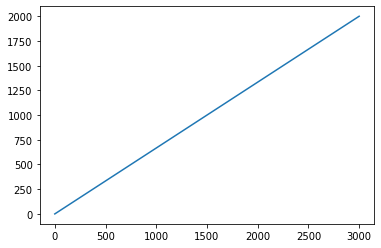

In [36]:
import matplotlib.pyplot as plt
import numpy as np
x_data = (Xi,Xf)
y_data = (Yi,Yf)
plt.plot(x_data, y_data)
plt.show()

Ahora ingrese los valores de las demás propiedades de los elementos: área de la sección transversal (A) y módulo de elasticidad (E).

In [37]:
A = 500 #Área de la sección transversal en mm^2
E = 200 #Módulo de elasticidad en GPa

Genere la matriz de rigidez del elemento en coordenadas locales (k). Las unidades son (kN/mm).
En el código esta matriz se llamará MAL.

In [38]:
import numpy as np
MAL = np.zeros((4,4), dtype =float) #genera una matriz de ceros de dimensión 4x4
MAL[0,0]=A*E/L
MAL[2,0]=-A*E/L
MAL[0,2]=-A*E/L
MAL[2,2]=A*E/L
print(MAL)

[[ 27.73500981   0.         -27.73500981   0.        ]
 [  0.           0.           0.           0.        ]
 [-27.73500981   0.          27.73500981   0.        ]
 [  0.           0.           0.           0.        ]]


Esta matriz es única para el elemento: *No importa la dirección del elemento, está siempre será su matriz de rigidez local.*

<div class="alert alert-info">
    
### Sugerencia

Modifique los valores de las propiedades de los elementos para ver sus efectos en la matriz de rigidez local.

</div>

## Matriz de transformación##

Ahora considere la posición del elemento en el espacio:

<center><img src="img\Elemento_inclinado.PNG" style="width: 400px;"/></center>
$$
\begin{Bmatrix} F_{Xi}\\ F_{Yi}\\ F_{Xf}\\ F_{Yf}\end{Bmatrix} =
\begin{bmatrix}
CX &0 &0 &0\\
CY &0 &0 &0\\
0 &0 &CX &0\\
0 &0 & CY &0\\
\end{bmatrix}
\begin{Bmatrix} f_{xi}\\ f_{yi}\\ f_{xf}\\ f_{yf}\end{Bmatrix}
$$


$$
\{F\}=\begin{bmatrix}T\end{bmatrix}*\{f\}
$$

$
\begin{bmatrix}T\end{bmatrix}=$ Matriz de transformación de coordenadas

Cosenos directores: $CX=\frac{X_f-X_i}{L}$; $CY=\frac{Y_f-Y_i}{L}$

Cálculo de los cosenos directores del elemento:

In [39]:
CX=(Xf-Xi)/L
CY=(Yf-Yi)/L
print(CX)
print(CY)

0.8320502943378436
0.5547001962252291


Cálculo la matriz de transformación del elemento. En el código la matriz se almacena como MT.

In [40]:
MT = np.zeros((4,4), dtype =float) #generación de una matriz de ceros de dimensión 4x4.
MT[0,0]=CX
MT[1,0]=CY
MT[2,2]=CX
MT[3,2]=CY
print(MT)

[[0.83205029 0.         0.         0.        ]
 [0.5547002  0.         0.         0.        ]
 [0.         0.         0.83205029 0.        ]
 [0.         0.         0.5547002  0.        ]]


<div class="alert alert-info">
    
### Sugerencia

Modifique la dirección del elemento para ver su efecto en la matriz de transformación.

</div>

## Matriz del elemento en coordenadas globales##

$$
\begin{bmatrix}K\end{bmatrix}=\begin{bmatrix}T\end{bmatrix}*\begin{bmatrix}k\end{bmatrix}*\begin{bmatrix}T\end{bmatrix}^{-1}
$$



Cálculo de la matriz de rigidez del elemento en coordenadas globales (K):

In [41]:
K=np.dot(MT,np.dot(MAL,np.transpose(MT)))
print(K)

[[ 19.20116064  12.80077376 -19.20116064 -12.80077376]
 [ 12.80077376   8.53384917 -12.80077376  -8.53384917]
 [-19.20116064 -12.80077376  19.20116064  12.80077376]
 [-12.80077376  -8.53384917  12.80077376   8.53384917]]
